# MM-Fit accelerometer standardization QA

Visualize random windows from raw (`sw_*_acc.npy`) vs standardized (`sw_*_acc_std.npy`) streams to ensure shape preservation.

In [2]:
from pathlib import Path
import numpy as np
import random
import matplotlib.pyplot as plt

DATA_DIR = (Path.cwd() / '../datasets/mmfit').resolve()
SUBJECTS = sorted([d for d in DATA_DIR.iterdir() if d.is_dir()])
print('Found subjects:', [s.name for s in SUBJECTS[:5]])

Found subjects: ['w00', 'w01', 'w02', 'w03', 'w04']


In [3]:
def load_pair(subject_dir: Path, limb: str = 'l'):
    raw = np.load(subject_dir / f"{subject_dir.name}_sw_{limb}_acc.npy")
    std = np.load(subject_dir / f"{subject_dir.name}_sw_{limb}_acc_std.npy")
    return raw, std

In [4]:
raw, std = load_pair(SUBJECTS[2])
raw.shape, std.shape

((254580, 5), (254580, 5))

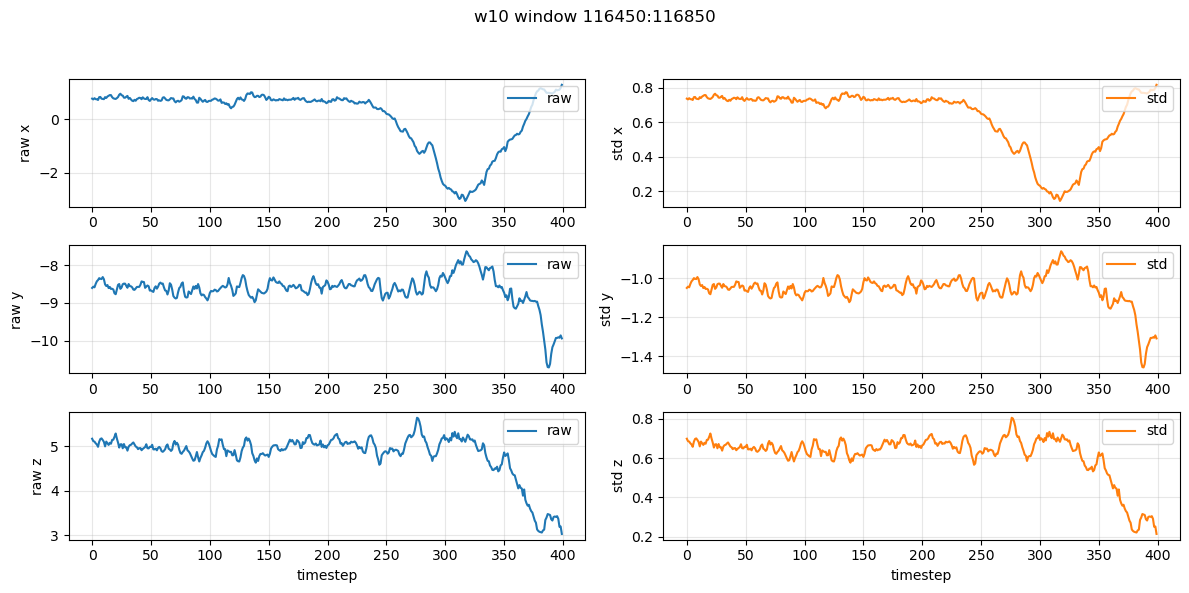

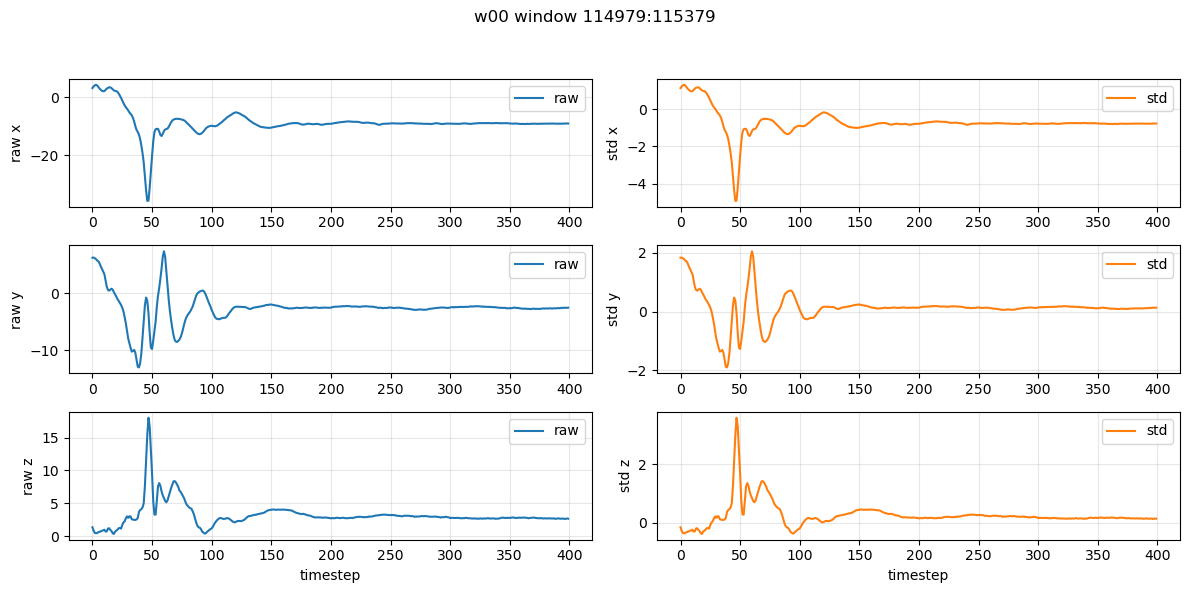

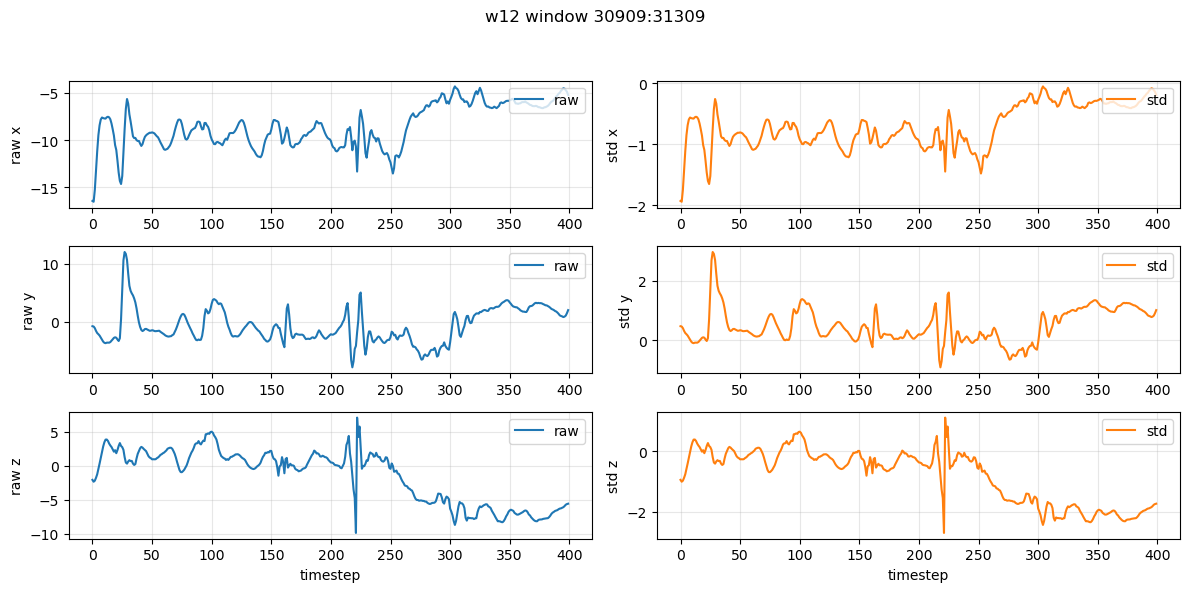

In [6]:
window_size = 400
random.seed(1283)
num_subjects = min(3, len(SUBJECTS))
for subject_dir in random.sample(SUBJECTS, k=num_subjects):
    raw, std = load_pair(subject_dir, 'l')
    max_start = raw.shape[0] - window_size
    start = random.randint(0, max_start)
    end = start + window_size
    raw_window = raw[start:end, 2:].T
    std_window = std[start:end, 2:].T
    fig, axs = plt.subplots(3, 2, figsize=(12, 6))
    fig.suptitle(f"{subject_dir.name} window {start}:{end}")
    axes_labels = ['x', 'y', 'z']
    for axis in range(3):
        axs[axis, 0].plot(raw_window[axis], label='raw')
        axs[axis, 0].set_ylabel(f'raw {axes_labels[axis]}')
        axs[axis, 0].grid(True, alpha=0.3)
        axs[axis, 0].legend(loc='upper right')
        axs[axis, 1].plot(std_window[axis], label='std', color='tab:orange')
        axs[axis, 1].set_ylabel(f'std {axes_labels[axis]}')
        axs[axis, 1].grid(True, alpha=0.3)
        axs[axis, 1].legend(loc='upper right')
    axs[-1, 0].set_xlabel('timestep')
    axs[-1, 1].set_xlabel('timestep')
    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()